<a href="https://colab.research.google.com/github/anitakumar/ml/blob/main/HierarchialClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv('Mall_customers.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df1 = df.iloc[0,3:5]

In [7]:
df1.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, Annual Income (k$) to Spending Score (1-100)
Series name: 0
Non-Null Count  Dtype 
--------------  ----- 
2 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [9]:
df1.head()


,0
Annual Income (k$),15
Spending Score (1-100),39


In [10]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

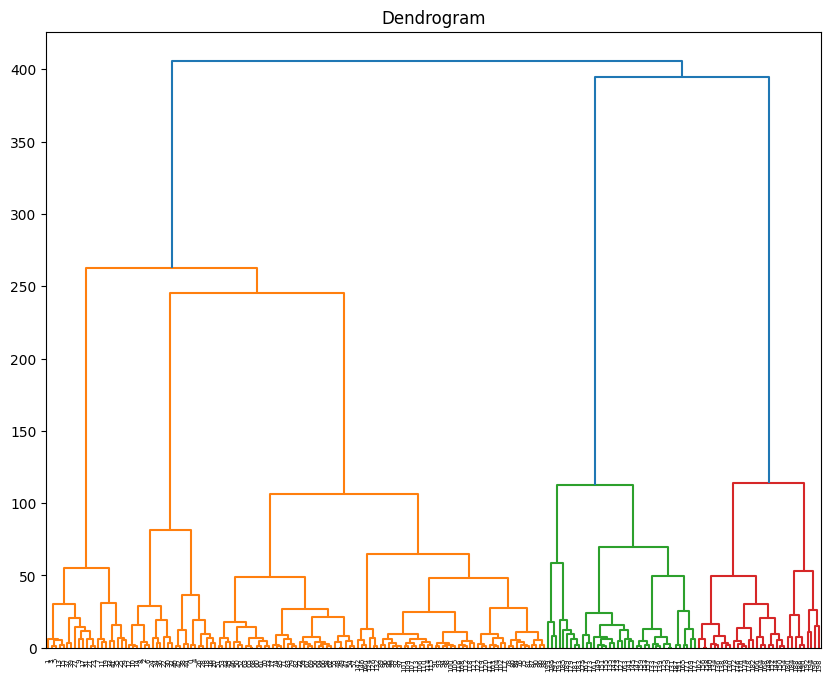

In [14]:
# Assuming you want to cluster all rows of the original DataFrame 'df'
# and you want to use columns 3 and 4 as features:
df1 = df.iloc[:,3:5]

plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(df1,method='ward'))
plt.title('Dendrogram')
# plt.xlabel('Customers')
# plt.ylabel('Euclidean Distance')
plt.show()

different cluster more then 3


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        3  
2        4  
3        3  
4        4  


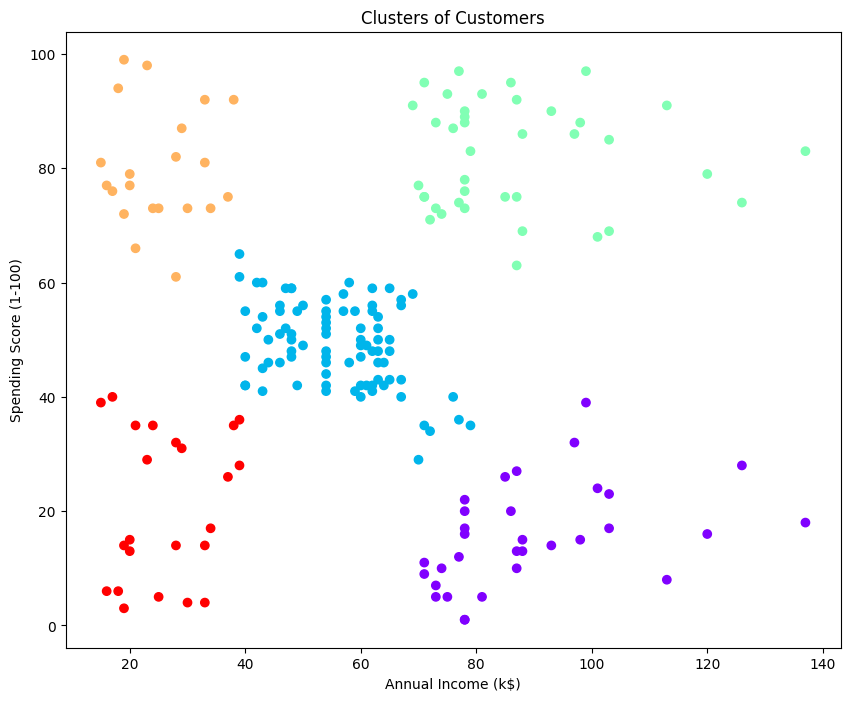

In [16]:
# prompt: #identify the clusters

import matplotlib.pyplot as plt
# Fit the Agglomerative Clustering model
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df1)
y_hc
# Add the cluster labels to the DataFrame
df['Cluster'] = y_hc

# View the cluster assignments
print(df.head())

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


5 different clusters created